In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from ast import literal_eval as make_tuple

In [36]:
goal_x=5
goal_y=5

In [2]:
R=pd.read_csv('Resultats.csv')
R

,r_t,a_t,s_t,s_t_p_1,id_simulation
0,-2.022769,"(3, 4)","(1, 1)","(1, 0)",0
1,-3.014403,"(2, 2)","(1, 0)","(0, 0)",0
2,-20.000000,"(1, 4)","(0, 0)","(0, 0)",0
3,-5.223606,"(1, 3)","(0, 0)","(0, 1)",0
4,-2.694863,"(2, 1)","(0, 1)","(1, 1)",0
...,...,...,...,...,...
56415,-6.039787,"(1, 2)","(2, 17)","(1, 17)",999
56416,-3.358129,"(2, 4)","(1, 17)","(1, 16)",999
56417,-3.019893,"(2, 3)","(1, 16)","(1, 17)",999
56418,-6.000000,"(0, 3)","(1, 17)","(1, 17)",999


In [3]:
# tocsv traduit les tuple en str. On a besoin de les reconvertir en tuple. 
R["a_t"]=R["a_t"].apply(make_tuple)
R["s_t"]=R["s_t"].apply(make_tuple)
R["s_t_p_1"]=R["s_t_p_1"].apply(make_tuple)
R

,r_t,a_t,s_t,s_t_p_1,id_simulation
0,-2.022769,"(3, 4)","(1, 1)","(1, 0)",0
1,-3.014403,"(2, 2)","(1, 0)","(0, 0)",0
2,-20.000000,"(1, 4)","(0, 0)","(0, 0)",0
3,-5.223606,"(1, 3)","(0, 0)","(0, 1)",0
4,-2.694863,"(2, 1)","(0, 1)","(1, 1)",0
...,...,...,...,...,...
56415,-6.039787,"(1, 2)","(2, 17)","(1, 17)",999
56416,-3.358129,"(2, 4)","(1, 17)","(1, 16)",999
56417,-3.019893,"(2, 3)","(1, 16)","(1, 17)",999
56418,-6.000000,"(0, 3)","(1, 17)","(1, 17)",999


In [4]:
type(R["s_t"].tolist()[0])

tuple

In [5]:
def q_learning(situations, eta, gamma):
    # Initialisation du dictionnaire Q avec des valeurs nulles
    liste_simulations = np.unique(situations["id_simulation"].tolist())
    Q={}
    for simulation in liste_simulations:
            sous_base = situations[situations["id_simulation"] == simulation]
            for row in sous_base.itertuples():
                etat_k = row.s_t
                action_k = row.a_t
                cle = (etat_k, action_k)
                Q[cle]=0
    
    
    threshold = 1e-3

    convergence = False
    while not convergence:
        Q_ant = dict(Q)  # Sauvegarde des valeurs de Q de l'itération précédente
        
        for simulation in liste_simulations:
            sous_base = situations[situations["id_simulation"] == simulation]
            for row in sous_base.itertuples():
                etat_k =row.s_t
                action_k = row.a_t
                cle = (etat_k, action_k)
                recompense = row.r_t
                situation_t_plus = row.s_t_p_1


                list_cle = [key for key in list(Q_ant.keys()) if key[0] == situation_t_plus]

                if len(list_cle) == 0:
                     Q_max = 0
                else:
                    Q_max = np.max([Q_ant[cle] for cle in list_cle])

                # Calcul de la valeur de Q en utilisant la formule de mise à jour de Q-learning
                # Q_max = np.max([Q_ant.get((situation_t_plus, int(a))) for a in actions["id"].tolist()])
                Q[cle] = (1 - eta) * Q_ant[cle] + eta * (recompense + gamma * Q_max)
        
        # Vérification de la convergence
        dist = sum(np.absolute(np.subtract(list(Q.values()),list(Q_ant.values()))))
        # convergence = all(abs(Q[k] - Q_ant[k]) < 1e-6 for k in Q.keys())
        if dist < threshold:
            convergence = True
    
    return Q



In [6]:
eta=0.7
gamma=0.6

In [7]:
R

,r_t,a_t,s_t,s_t_p_1,id_simulation
0,-2.022769,"(3, 4)","(1, 1)","(1, 0)",0
1,-3.014403,"(2, 2)","(1, 0)","(0, 0)",0
2,-20.000000,"(1, 4)","(0, 0)","(0, 0)",0
3,-5.223606,"(1, 3)","(0, 0)","(0, 1)",0
4,-2.694863,"(2, 1)","(0, 1)","(1, 1)",0
...,...,...,...,...,...
56415,-6.039787,"(1, 2)","(2, 17)","(1, 17)",999
56416,-3.358129,"(2, 4)","(1, 17)","(1, 16)",999
56417,-3.019893,"(2, 3)","(1, 16)","(1, 17)",999
56418,-6.000000,"(0, 3)","(1, 17)","(1, 17)",999


In [8]:
QL = q_learning(eta=eta,gamma=gamma,situations=R)

In [15]:
QL

{((1, 1), (3, 4)): -4.102058325334368,
 ((1, 0), (2, 2)): -5.236938347489592,
 ((0, 0), (1, 4)): -22.22253531023009,
 ((0, 0), (1, 3)): -7.1866296974629496,
 ((0, 1), (2, 1)): -4.8446430293765435,
 ((1, 1), (2, 2)): -4.5748267372263385,
 ((0, 1), (3, 1)): -3.9463553267104903,
 ((1, 1), (3, 3)): -3.5829667690612865,
 ((1, 2), (1, 3)): -7.099132646109227,
 ((1, 3), (3, 4)): -3.5829667690612865,
 ((1, 2), (3, 4)): -3.9463553267104903,
 ((1, 1), (0, 2)): -8.149779921378384,
 ((1, 1), (0, 1)): -8.149779921378384,
 ((1, 1), (0, 4)): -8.149779921378384,
 ((1, 1), (1, 1)): -6.745401788001567,
 ((2, 1), (0, 3)): -8.079289660425811,
 ((2, 1), (0, 1)): -8.079289660425811,
 ((2, 1), (1, 1)): -7.251574065828058,
 ((3, 1), (0, 1)): -7.98053247052292,
 ((3, 1), (3, 4)): -3.5065822305518406,
 ((3, 0), (3, 1)): -3.30805347114028,
 ((4, 0), (0, 3)): -7.983718208546401,
 ((4, 0), (2, 2)): -4.267457371930353,
 ((3, 0), (0, 3)): -7.984831947794818,
 ((4, 0), (2, 1)): -3.970647330697992,
 ((5, 0), (1, 2)): 

In [16]:
Etats=[]
best_action=[]
best_reward=[]
for cle in QL.keys():
    Liste_actions=[]
    Liste_recompense=[]
    if cle[0] not in Etats: 
        Etats.append(cle[0])
        for cle2,valeur_recompense in QL.items():
            if cle[0]==cle2[0]:
                Liste_actions.append(cle2[1])
                Liste_recompense.append(valeur_recompense)
        indice_meilleur=np.argmax(Liste_recompense)
        MR_action=Liste_actions[indice_meilleur]
        MR_recompense=Liste_recompense[indice_meilleur]
        best_action.append(MR_action)
        best_reward.append(MR_recompense)
Best_action_per_state=pd.DataFrame({"etats":Etats,"Meilleure_action":best_action,"Meilleure_recompense":best_reward})

In [17]:
Best_action_per_state

,etats,Meilleure_action,Meilleure_recompense
0,"(1, 1)","(3, 3)",-3.582967
1,"(1, 0)","(3, 1)",-3.465483
2,"(0, 0)","(3, 3)",-3.704226
3,"(0, 1)","(3, 3)",-3.271707
4,"(1, 2)","(3, 2)",-3.271707
...,...,...,...
395,"(16, 5)","(3, 1)",-3.078959
396,"(17, 5)","(3, 1)",-2.482201
397,"(15, 5)","(3, 4)",-3.139985
398,"(6, 4)","(3, 3)",0.031204


In [18]:
Liste_Pos_abs=[]
Liste_Pos_abs2=[]
Decision_v=[]
Decision_angle=[]
for row in Best_action_per_state.itertuples():
    pos_x=row.etats[0]
    pos_y=row.etats[1]
    Liste_Pos_abs.append(pos_x)
    Liste_Pos_abs2.append(pos_y)
    V=row.Meilleure_action[0]
    theta=row.Meilleure_action[1]
    Decision_v.append(V)
    Decision_angle.append(theta)

In [19]:
DF_graphique=pd.DataFrame({"angle_pris":Decision_angle,"vitesse_prise":Decision_v,"Pos_x":Liste_Pos_abs,"Pos_y":Liste_Pos_abs2})

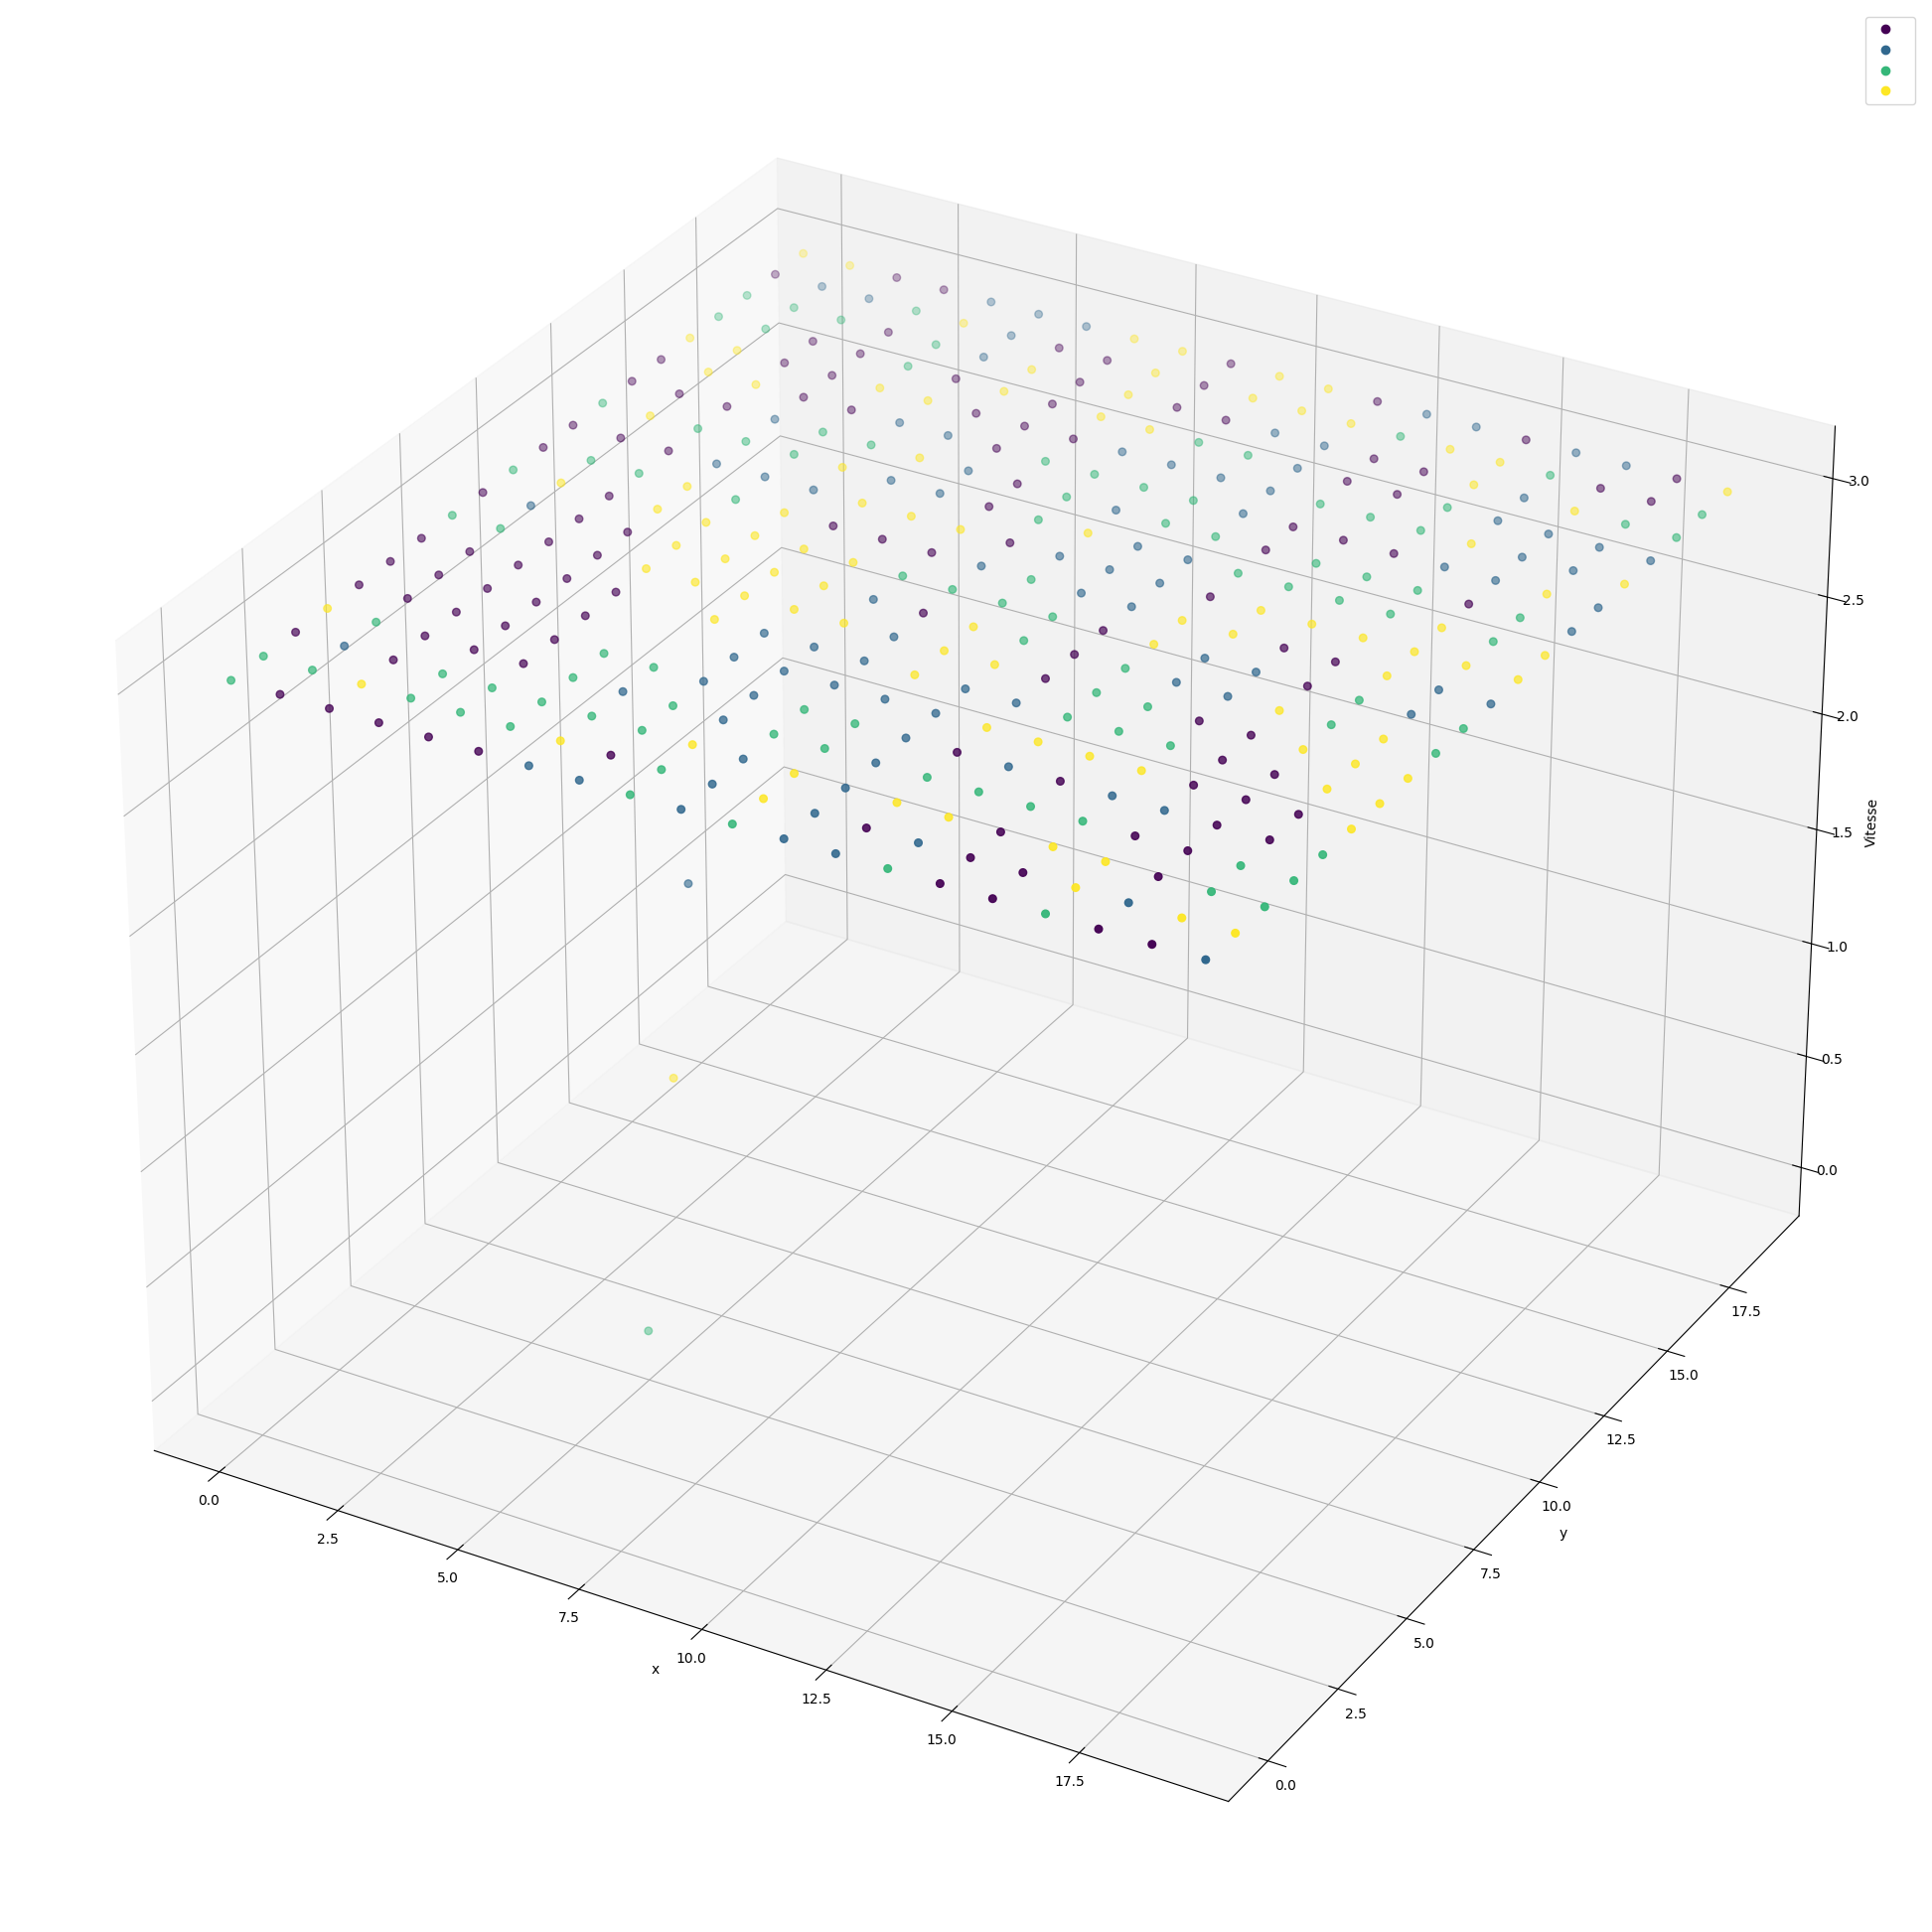

In [20]:
ZL = [0,3]
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111, projection='3d')
ANGLES=["1","2","3","4"]
scatter=ax.scatter(DF_graphique.Pos_x,DF_graphique.Pos_y,DF_graphique.vitesse_prise,c=DF_graphique.angle_pris,s=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Vitesse')
plt.legend(handles=scatter.legend_elements()[0])
plt.show()

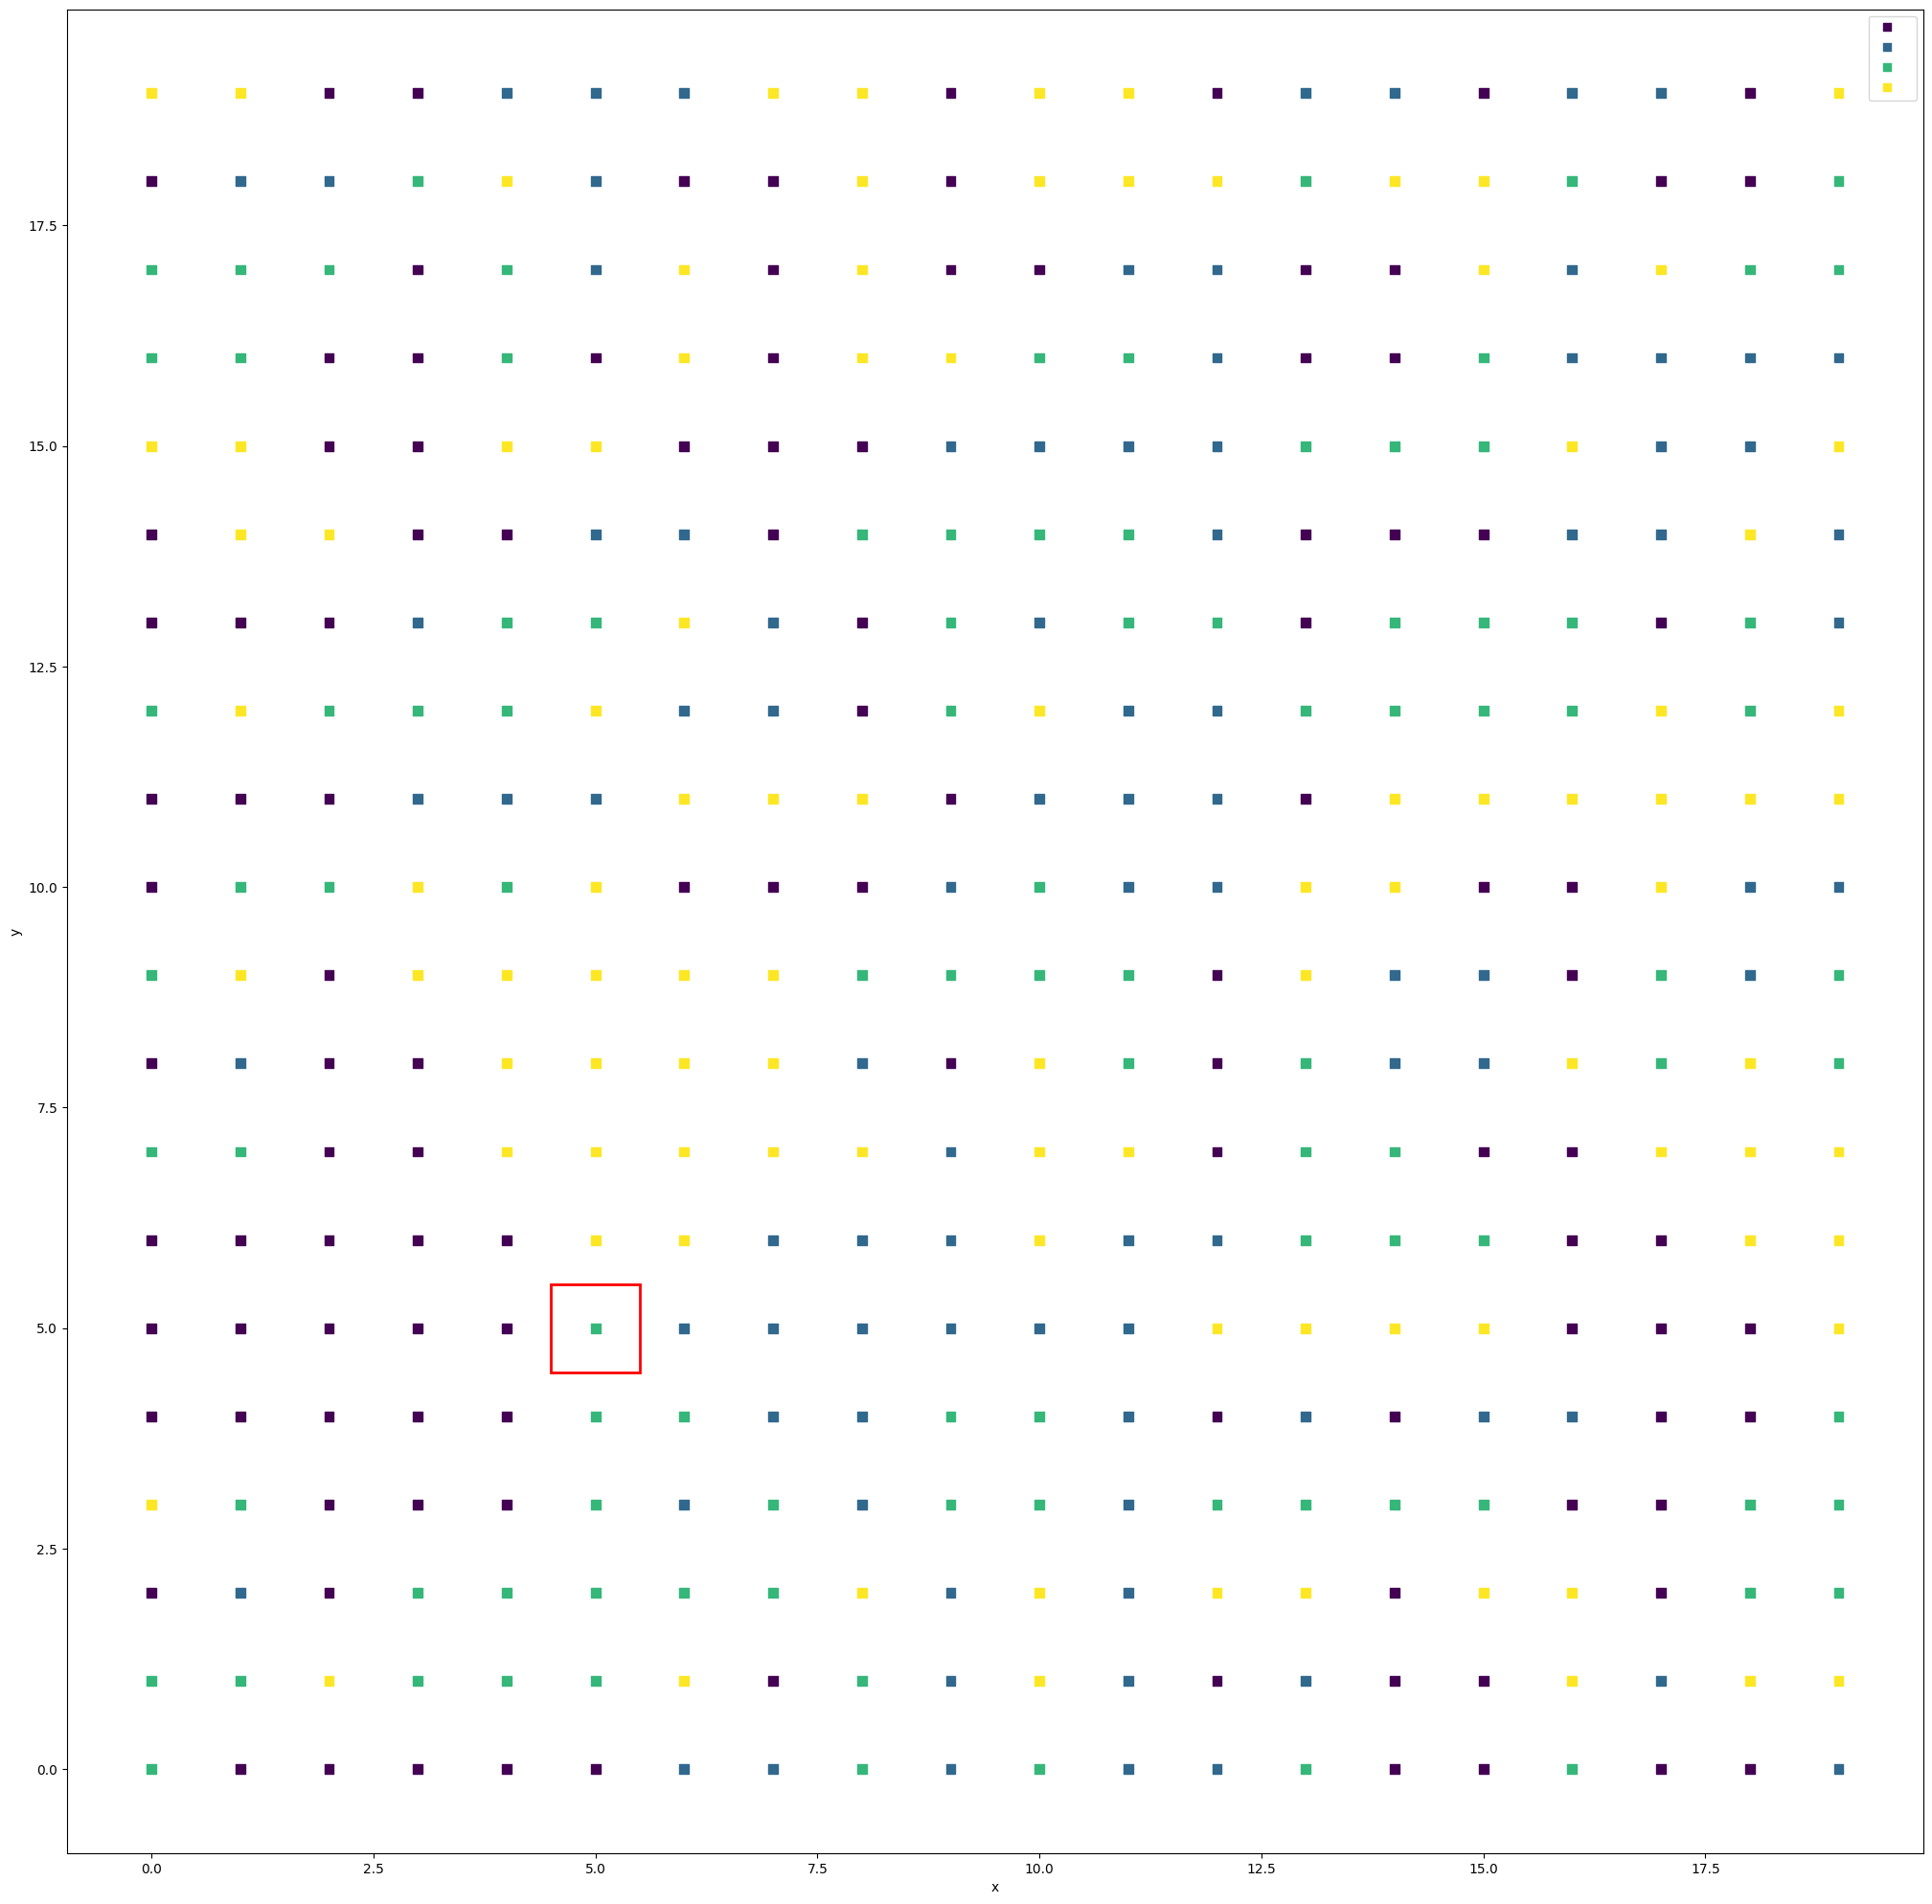

In [38]:
import matplotlib
fig,ax = plt.subplots(figsize=(25,25))
xrect=goal_x-0.5
yrect=goal_y-0.5
ANGLES=["1","2","3","4"]
scatter=ax.scatter(DF_graphique.Pos_x,DF_graphique.Pos_y,c=DF_graphique.angle_pris,s=50,marker="s")
rect1 = matplotlib.patches.Rectangle((xrect,yrect), 1,1, color='red', fc = 'none',lw = 2)
ax.add_patch(rect1)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend(handles=scatter.legend_elements()[0])
plt.show()